In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score


- #### polynomial regression

In [2]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

In [3]:
myModel = np.poly1d(np.polyfit(x, y, 3))
myLine = np.linspace(1, 22, 100)

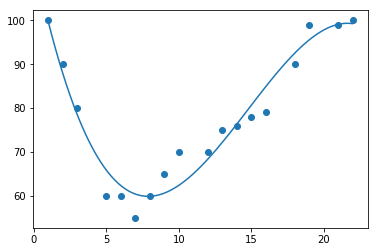

In [4]:
plt.scatter(x, y)
plt.plot(myLine, myModel(myLine))
plt.show()

In [6]:
print(r2_score(y, myModel(x)))

0.943215041645


In [7]:
speed = myModel(17)
speed

88.873312696979738

#### Multiple Regression

In [12]:
"""
predict the CO2 emission of a car where the weight is 2300 kg and the volume is 1300 cm3
predictedCO2 = regr.predict([[2300, 1300]])
from sklearn import linear_model
df = pandas.read_csv("House_Rent_Dataset")
X = df[["Weight", "Volume"]]
Y = df[["CO2"]]
regr = linear_model.LinearRegression()
regr.fit(X, Y)
predictedCO2 = regr.predict([[2300, 1300]])
print(predictedCO2)
"""

'\npredict the CO2 emission of a car where the weight is 2300 kg and the volume is 1300 cm3\npredictedCO2 = regr.predict([[2300, 1300]])\nfrom sklearn import linear_model\ndf = pandas.read_csv("House_Rent_Dataset")\nX = df[["Weight", "Volume"]]\nY = df[["CO2"]]\nregr = linear_model.LinearRegression()\nregr.fit(X, Y)\npredictedCO2 = regr.predict([[2300, 1300]])\nprint(predictedCO2)\n'

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import linear_model

In [20]:
# Multiple Regression
df = pd.read_csv("House_Rent_Dataset.csv")
df_new = df[["Rent","Furnishing Status", "Size"]]
df_new.head()

,Rent,Furnishing Status,Size
0,10000,Unfurnished,1100
1,20000,Semi-Furnished,800
2,17000,Semi-Furnished,1000
3,10000,Unfurnished,800
4,7500,Unfurnished,850


In [21]:
df_new = pd.get_dummies(df_new)
df_new

,Rent,Size,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,10000,1100,0,0,1
1,20000,800,0,1,0
2,17000,1000,0,1,0
3,10000,800,0,0,1
4,7500,850,0,0,1
5,7000,600,0,0,1
6,10000,700,0,0,1
7,5000,250,0,0,1
8,26000,800,0,0,1
9,10000,1000,0,1,0


In [41]:
X = df_new[["Size", "Furnishing Status_Furnished", "Furnishing Status_Semi-Furnished", "Furnishing Status_Unfurnished"]]
Y = df_new[["Rent"]]
regr = linear_model.LinearRegression()
regr.fit(X, Y)
predictedRent = regr.predict([[1300, 1, 0, 0]])
print(predictedRent)

[[ 68742.50228411]]


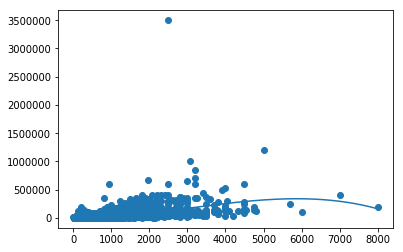

In [45]:
# Polynomial Regression
myModel = np.poly1d(np.polyfit(df_new['Size'], df_new['Rent'], 3))
myLine = np.linspace(df_new['Size'].min(),df_new['Size'].max(), len(df_new['Size']))
plt.scatter(df_new['Size'], df_new['Rent'])
plt.plot(myLine, myModel(myLine))
plt.show()

In [31]:
# Linear Regression
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(df_new['Size'], df_new['Rent'])

In [32]:
def myFunc(x):
    return slope*x + intercept

In [34]:
myModel = list(map(myFunc, df_new['Size']))

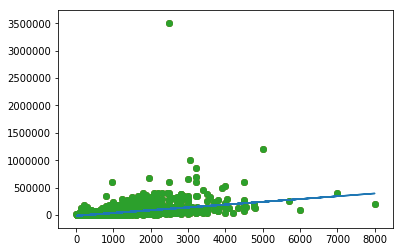

In [38]:
plt.scatter(df_new['Size'], df_new['Rent'])
plt.plot(df_new['Size'], myModel)
plt.show()